In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")
df=pd.read_csv("../data/Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df['TotalCharges']=df['TotalCharges'].replace(" ", 0).astype('float32') # replacing empty fiends of total charge column with 0, customer never paid any thing

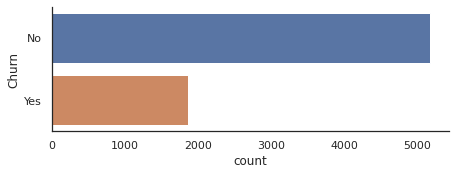

In [3]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5,orient='h') # to check how many clients left the company we are taking boolian data from column churn

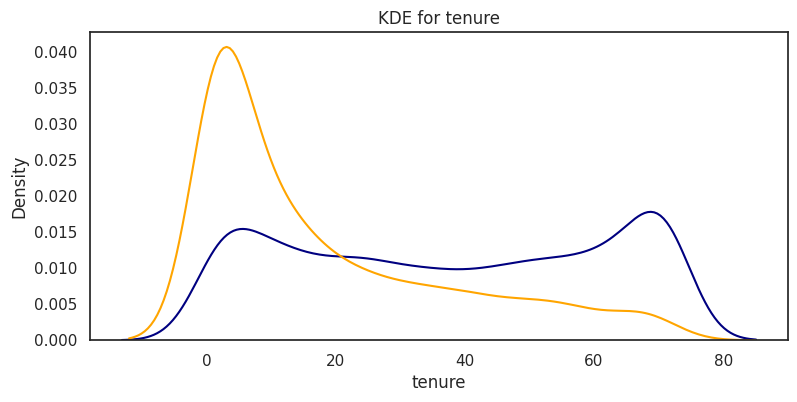

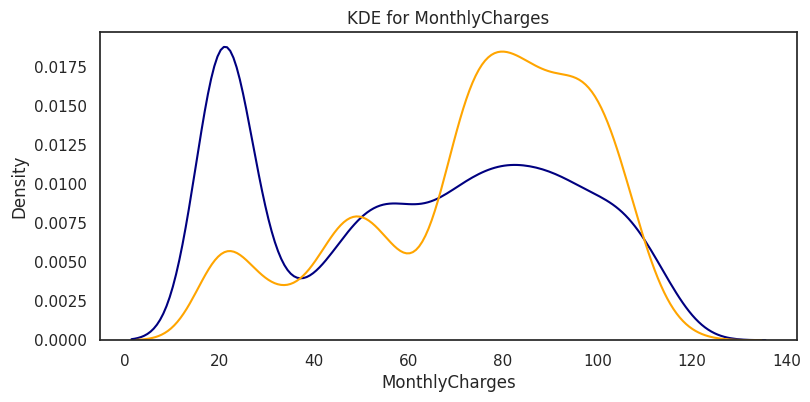

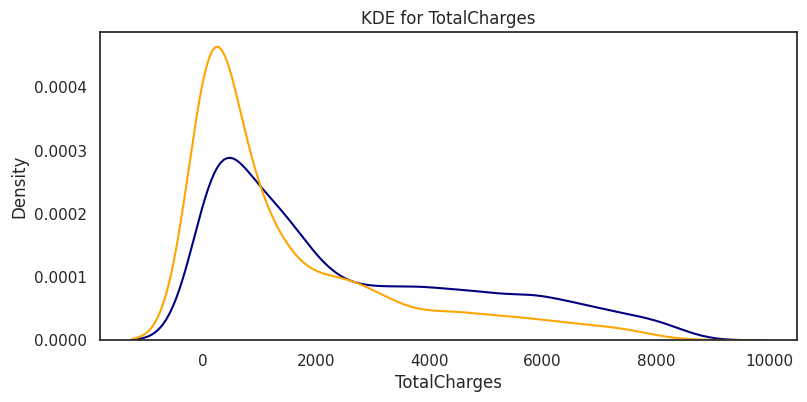

In [4]:
def kdeplot(feature):
    plt.figure(figsize=(9,4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color = 'navy', label = 'Churn: No' )
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color = 'orange', label = 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges') 

# probability density destribution depending on three columns(tenure,monthly charges, total charges)
#results, recent clients are more likely to churn
#clients with higher monthly charges also likely to churn
#Tenure and monthly charges are mostly important features

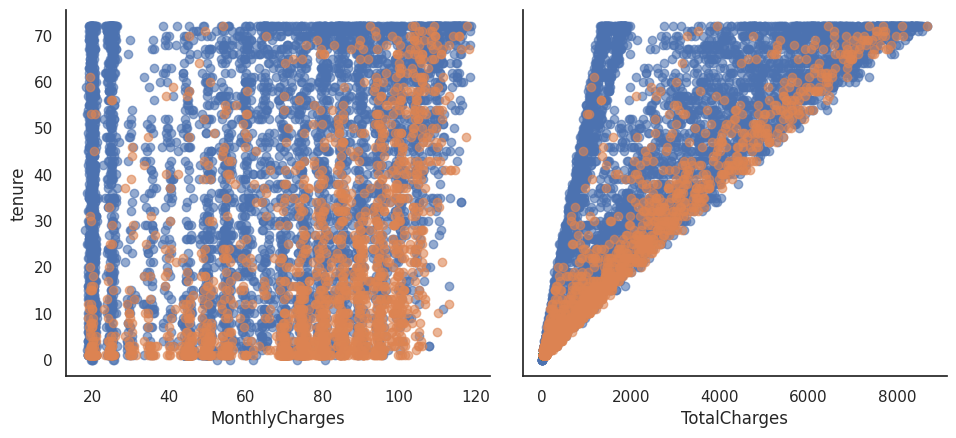

In [5]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6) # we can observe bounderies when we use scatterplot, showing us density of leaving and staying due to increase of total and monthly charge

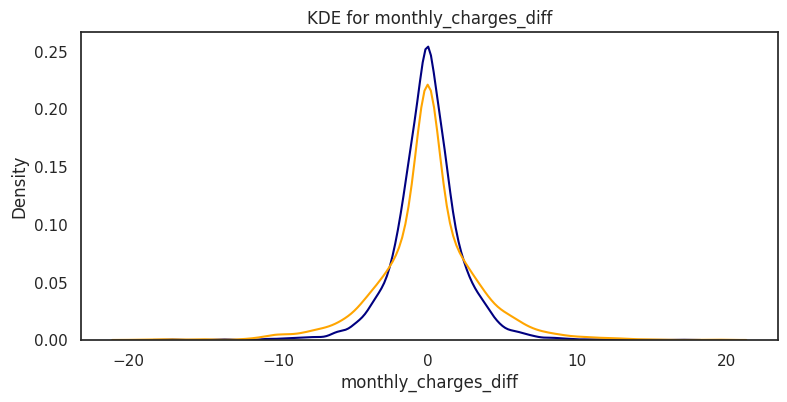

In [6]:
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

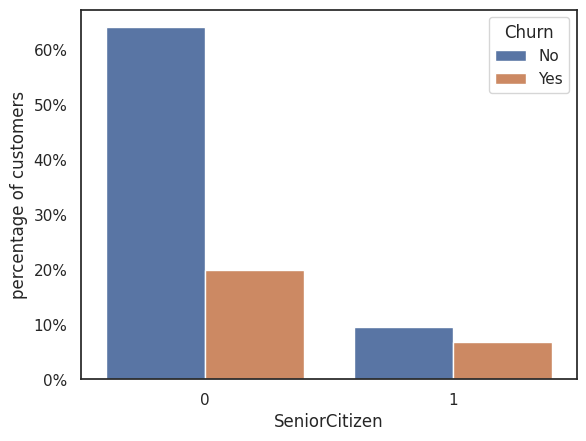

In [7]:
# Six binary features (Yes/No)
# Nine features with three unique values each (categories)
# One feature with four unique values

def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis = 1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x = feature, y = axis_name, hue = 'Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue = 'Churn', data = g, orient = orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        ax.plot()

            
barplot_percentages("SeniorCitizen")

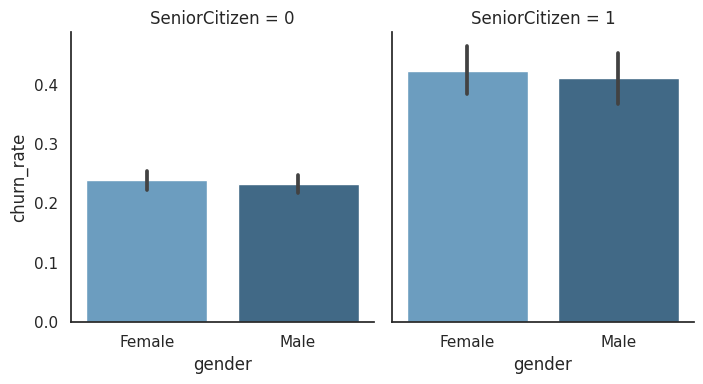

In [8]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height = 4, aspect = .9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order=['Female', 'Male'])

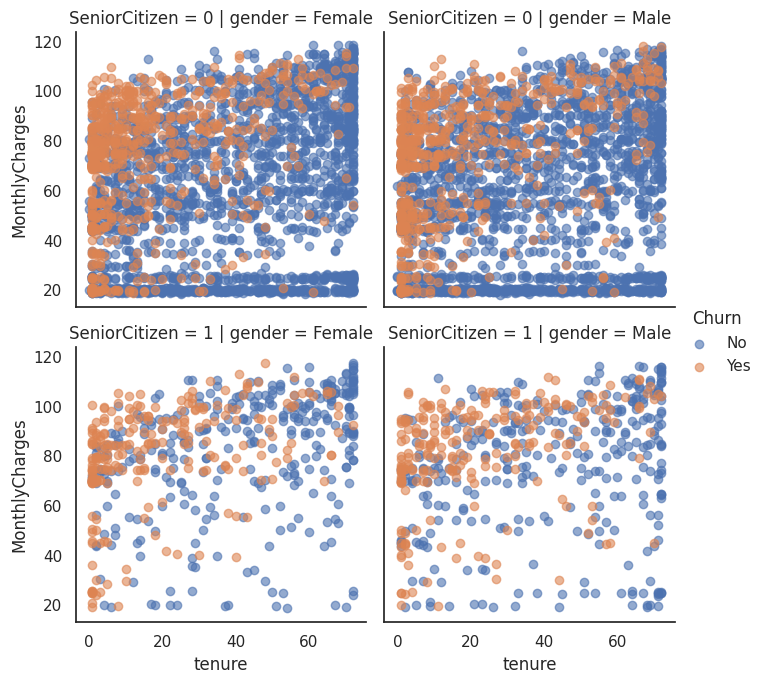

In [9]:
g = sns.FacetGrid(df, row = 'SeniorCitizen', col = "gender", hue = "Churn", height = 3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

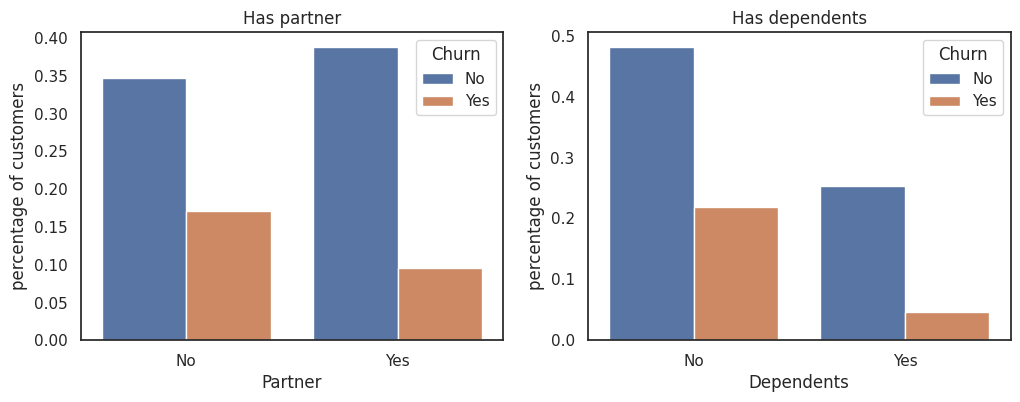

In [10]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"

gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y=axis_y, hue='Churn', data=gp_partner, ax=axis[0])

gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis = 1).reset_index()
ax = sns.barplot(x = 'Dependents', y = axis_y, hue = 'Churn', data = gp_dep, ax = axis[1])

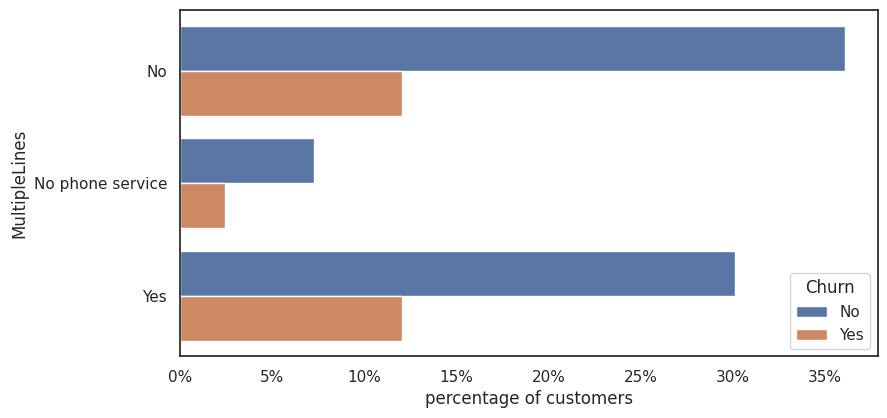

In [11]:
plt.figure(figsize=(9,4.5))
barplot_percentages("MultipleLines", orient='h')

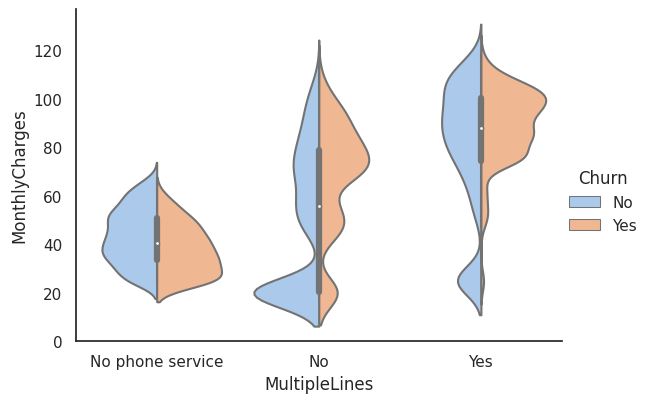

In [12]:
ax = sns.catplot(x="MultipleLines", y = "MonthlyCharges",
                 hue="Churn", kind="violin", split= True, palette="pastel", data=df, height=4.2, aspect=1.4)

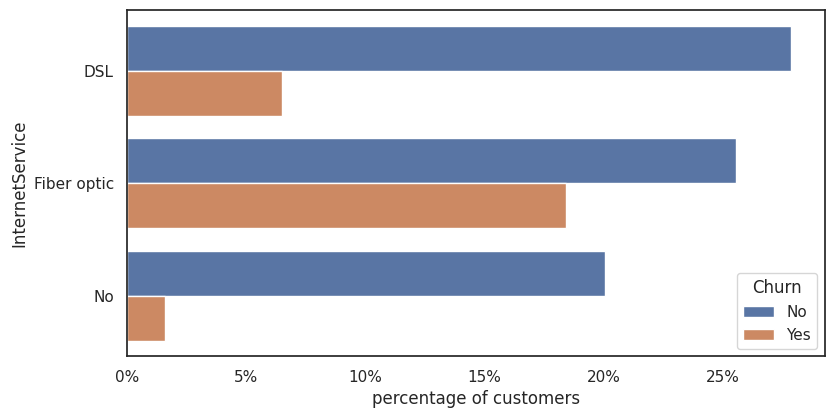

In [13]:
plt.figure(figsize=(9,4.5))
barplot_percentages("InternetService", orient='h')

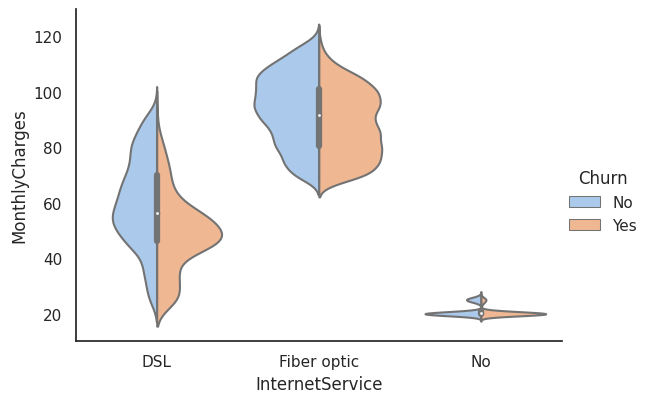

In [14]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges",
                 hue="Churn", kind="violin", split=True, palette="pastel", data=df, height=4.2, aspect=1.4);

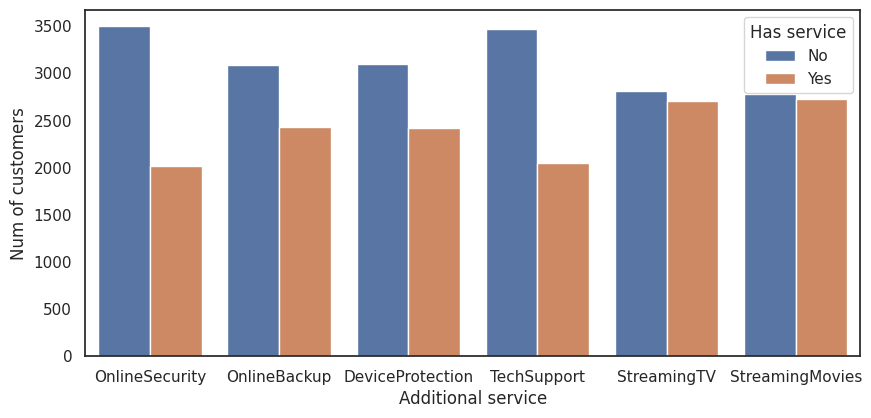

In [15]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value':'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

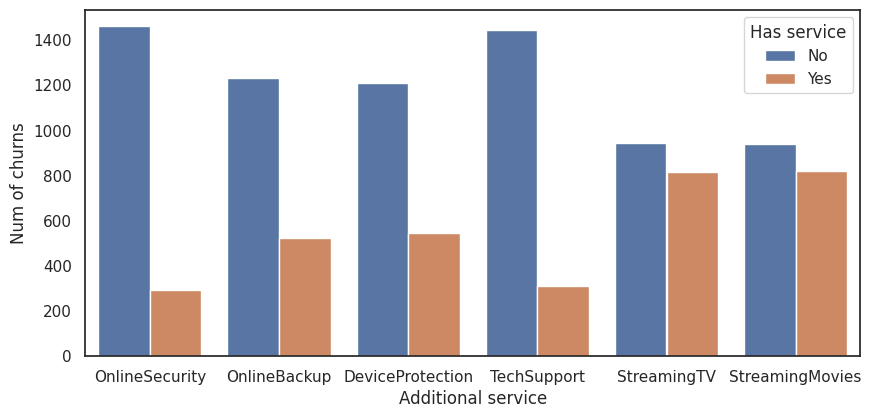

In [16]:
plt.figure(figsize=(10,4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data = df1, x='variable', hue = 'Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

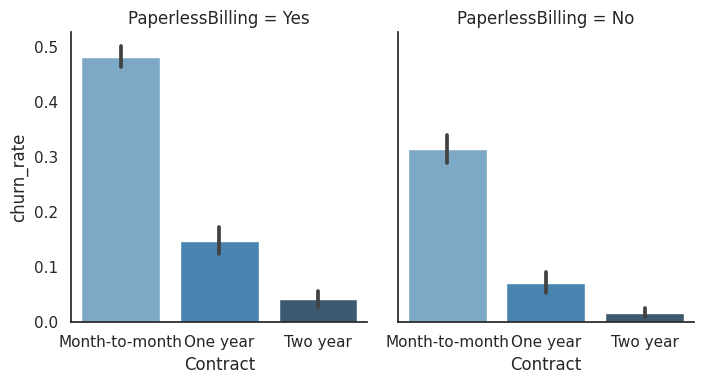

In [17]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=0.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order = ['Month-to-month', 'One year', 'Two year'])

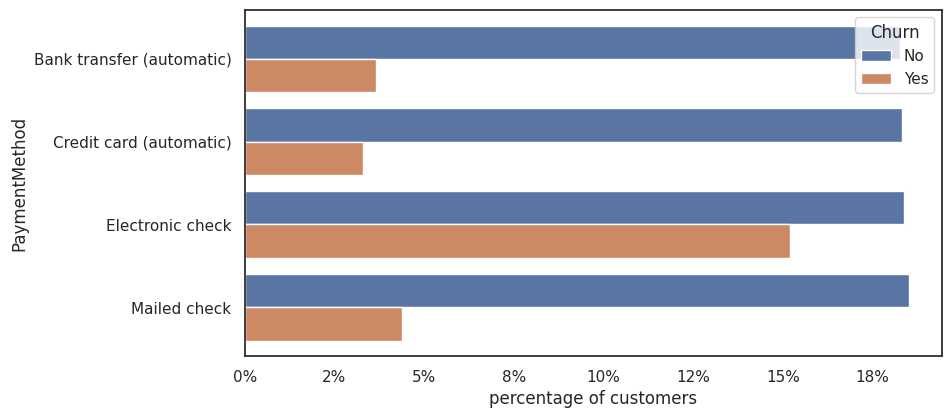

In [18]:
plt.figure(figsize=(9,4.5))
barplot_percentages("PaymentMethod", orient ='h')

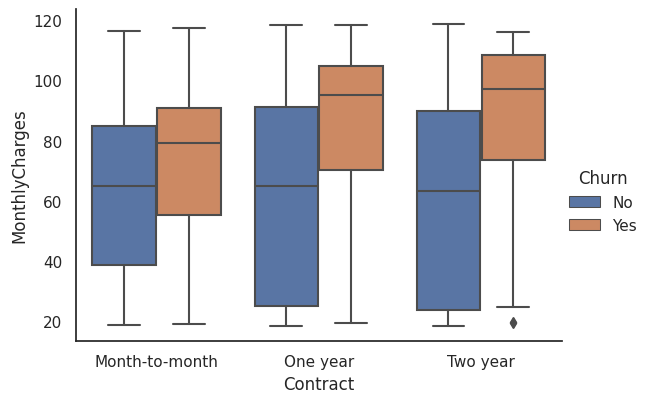

In [19]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

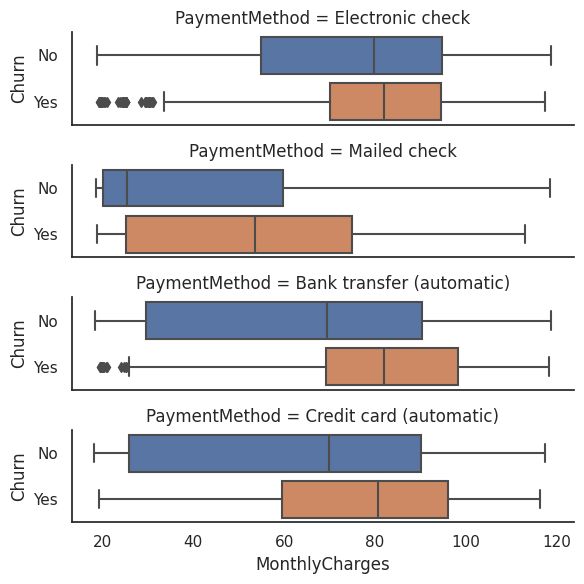

In [20]:
ax = sns.catplot(y = "Churn", x="MonthlyCharges", row = "PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')

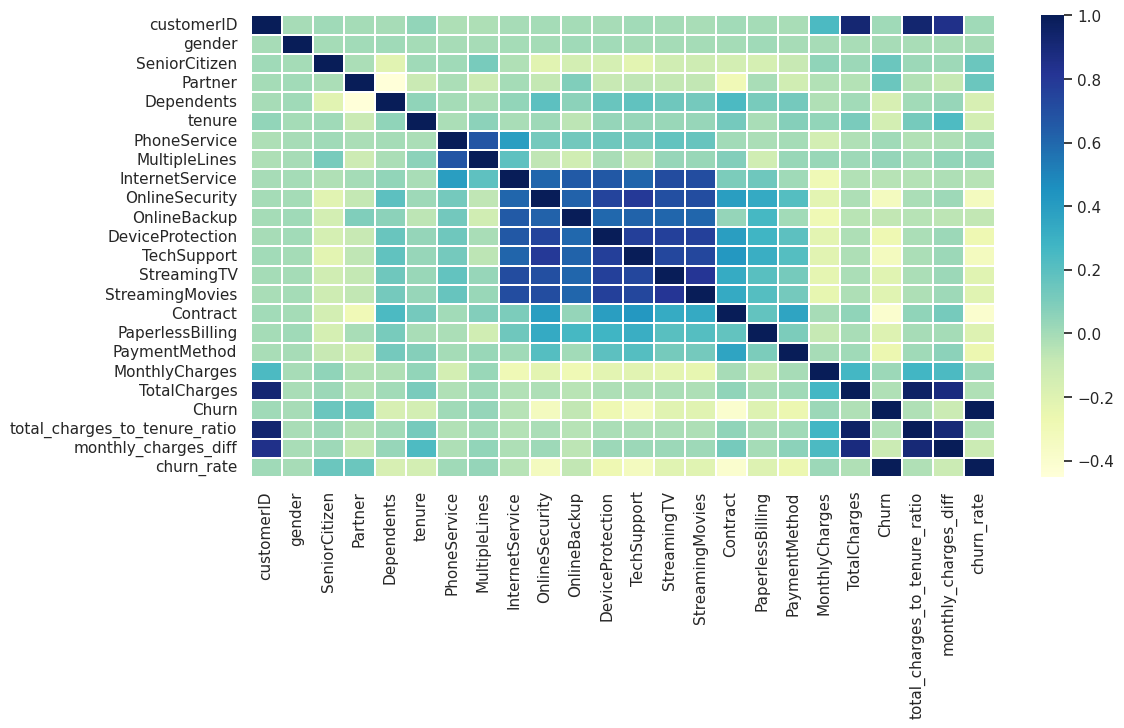

In [21]:
plt.figure(figsize=(12,6))
# df.drop(['customerID', 'churn_rate', 'total_charges_to_tenure_ratio', 'monthly_charges_diff'], axis=1, inplace=True)
corr = df.apply(lambda x : pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths =.2, cmap ="YlGnBu")

In [22]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charges_to_tenure_ratio,monthly_charges_diff,churn_rate
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,29.850000,-3.814697e-07,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.500000,No,55.573529,1.376471e+00,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,54.075001,-2.250008e-01,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No,40.905556,1.394444e+00,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,75.824997,-5.124997e+00,1


In [31]:
params = {'random_state': 0, 'n_jobs':4, 'n_estimators':5000, 'max_depth':8}
df = pd.get_dummies(df)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop, axis=1), df['Churn_Yes']

In [40]:
x["total_charges_to_tenure_ratio"] = x["total_charges_to_tenure_ratio"].fillna(x["total_charges_to_tenure_ratio"].mean())

In [49]:
x["monthly_charges_diff"] = x["monthly_charges_diff"].fillna(x["monthly_charges_diff"].mean())

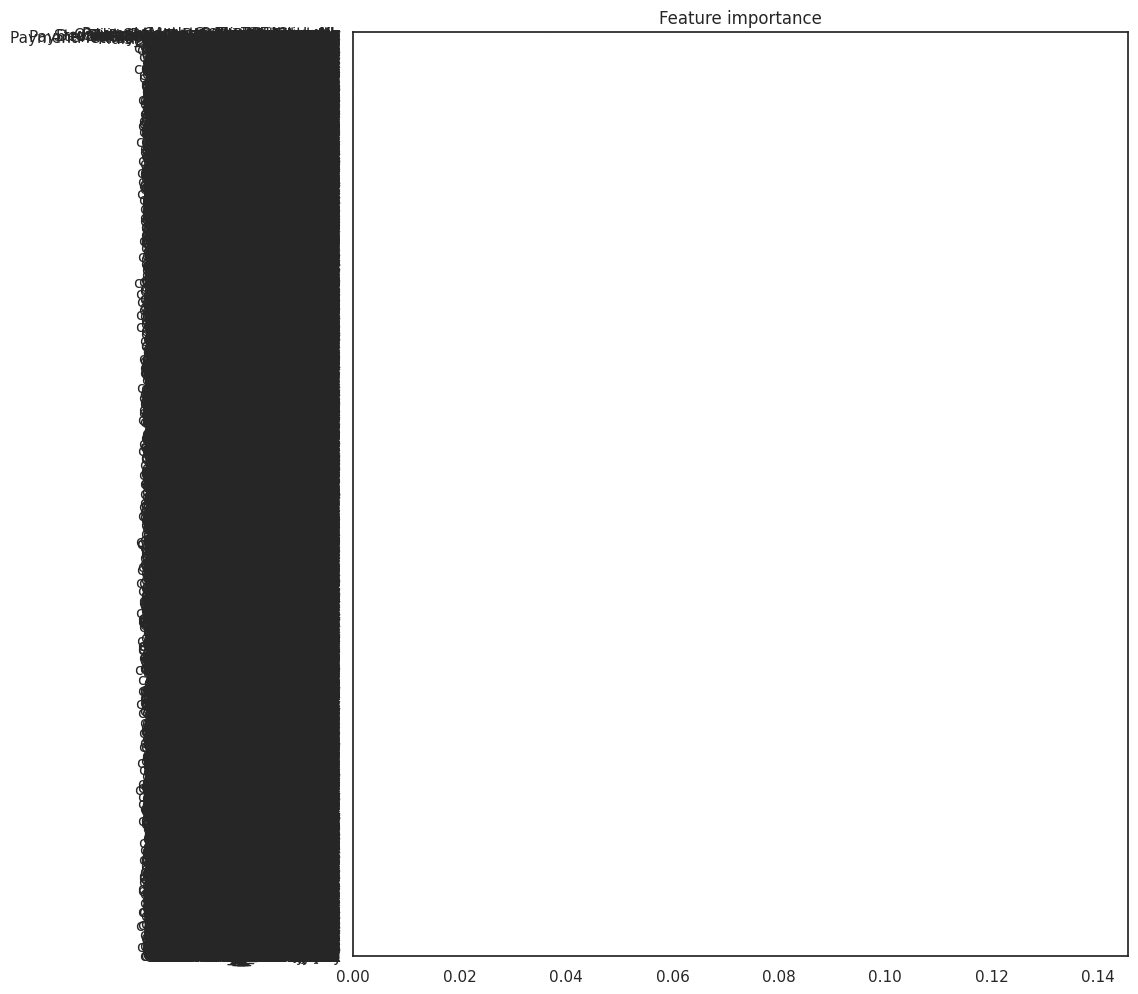

In [50]:
clf = RandomForestClassifier(**params)
clf = clf.fit(x,y)

imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')